In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import seaborn as sb

In [12]:
df1 = pd.read_csv('data/train.csv')

In [13]:
df2 = pd.read_csv('data/test.csv')

In [14]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
X_train = df1.drop(['Name','Cabin','Ticket'], axis = 1)
X_test = df1.drop(['Name','Cabin','Ticket'], axis = 1)

In [17]:
y_train = df1['Survived']

In [18]:
X_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [19]:
# stat, p_val = stats.shapiro(df1['Age'].values)
# print(stat, p_val)

In [20]:
X_train.isnull()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,False
889,False,False,False,False,False,False,False,False,False


In [21]:
X_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [22]:
df1[(df1['Survived']==0)].count()

PassengerId    549
Survived       549
Pclass         549
Name           549
Sex            549
Age            424
SibSp          549
Parch          549
Ticket         549
Fare           549
Cabin           68
Embarked       549
dtype: int64

/home/labuser/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


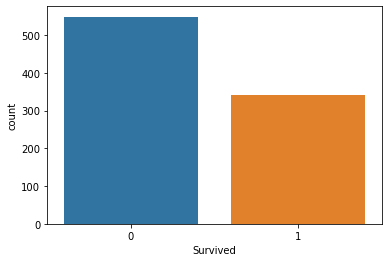

In [23]:
#bar plot for survived and not survived
sb.countplot('Survived',data=df1)
plt.show()
#342 Survived and 549 Died

In [24]:
continious_features = ['Age', 'Fare']
descrete_features = ['Pclass','Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']

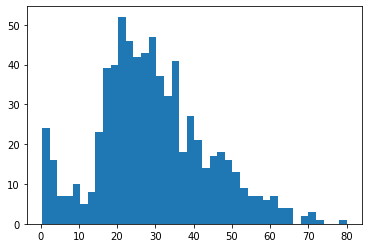

In [25]:
plt.hist(X_train['Age'], bins = 40)
plt.show()
#Almost Normal distribution

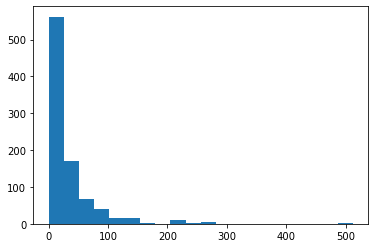

In [26]:
plt.hist(X_train['Fare'], bins = 20)
plt.show()
#Many Outliers present needs transformation

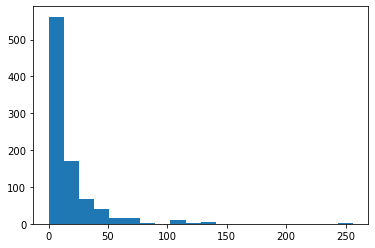

In [27]:
#Tried Upper limit for infinity and apply log transformation
plt.hist(X_train['Fare']**1/2, bins = 20)
plt.show()

In [28]:
X_train['Fare_log'] = np.log2(X_train['Fare'])
X_train.head()

/home/labuser/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_log
0,1,0,3,male,22.0,1,0,7.2500,S,2.857981
1,2,1,1,female,38.0,1,0,71.2833,C,6.155492
2,3,1,3,female,26.0,0,0,7.9250,S,2.986411
3,4,1,1,female,35.0,1,0,53.1000,S,5.730640
4,5,0,3,male,35.0,0,0,8.0500,S,3.008989


In [29]:
#If Fare is tranformed using log function the min value retuened is -inf. Need to check for the negative elements
X_train['Fare_log'].describe()

count    891.000000
mean           -inf
std             NaN
min            -inf
25%        2.983748
50%        3.853417
75%        4.954196
max        9.000927
Name: Fare_log, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='Age'>

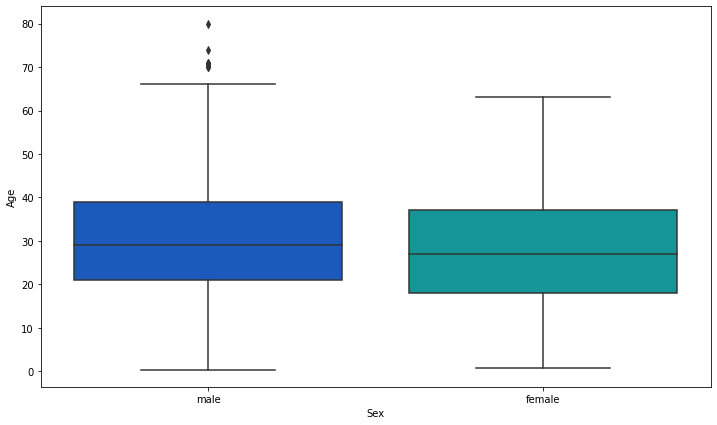

In [30]:
plt.figure(figsize=(12, 7))
sb.boxplot(x='Sex',y='Age',data=X_train,palette='winter') #Old aged Males(outliers) signifinance must be tested;

In [31]:
survived = df1[df1['Survived'] == 1]
died = df1[df1['Survived'] == 0]

In [32]:
mean1 = survived['Age'].mean()
mean2 = died['Age'].mean()

In [33]:
df1['PassengerId'].nunique()

891

In [34]:
#Replace Age with the 2 means calculated above
survived_new = X_train[(X_train['Age'].isna()) &(X_train['Survived']== 1)].fillna(mean1)

In [35]:
died_new = X_train[(X_train['Age'].isna()) &(X_train['Survived']== 0)].fillna(mean2)

In [36]:
notna_new = X_train[X_train['Age'].notna()]

In [37]:
X_train = pd.concat([survived_new,died_new,notna_new])
X_train = X_train.sort_values(by=['PassengerId'])
X_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_log
0,1,0,3,male,22.0,1,0,7.2500,S,2.857981
1,2,1,1,female,38.0,1,0,71.2833,C,6.155492
2,3,1,3,female,26.0,0,0,7.9250,S,2.986411
3,4,1,1,female,35.0,1,0,53.1000,S,5.730640
4,5,0,3,male,35.0,0,0,8.0500,S,3.008989


In [38]:
df1['Cabin'].describe() #Most data is missing, hence drop cabin & tickets

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [39]:
X_train = X_train.drop(['PassengerId', 'Survived','Fare_log'],axis = 1)
#X_test = X_test.drop(['PassengerId', 'Survived','Cabin','Ticket','Name'], axis = 1)

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


In [41]:
sex1 = pd.get_dummies(df1['Sex'])
embark1 = pd.get_dummies(df1['Embarked'])
sex1

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [42]:
embark1

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [43]:
X_train = pd.concat([X_train,embark1,sex1],axis =1)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,female,male
0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1
1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0
2,3,female,26.0,0,0,7.9250,S,0,0,1,1,0
3,1,female,35.0,1,0,53.1000,S,0,0,1,1,0
4,3,male,35.0,0,0,8.0500,S,0,0,1,0,1


In [44]:
X_train = X_train.drop(['Sex','Embarked'], axis = 1)

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
 5   C       891 non-null    uint8  
 6   Q       891 non-null    uint8  
 7   S       891 non-null    uint8  
 8   female  891 non-null    uint8  
 9   male    891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 46.1 KB


In [46]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,35.0,1,0,53.1000,0,0,1,1,0
4,3,35.0,0,0,8.0500,0,0,1,0,1


In [47]:
# y_train = df1['Survived']
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [48]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [49]:
clf.score(X_train,y_train)

0.8047138047138047

In [50]:
X_train = X_train.drop('female',axis = 1)

In [51]:
X_train = X_train.drop('C',axis = 1)

In [52]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,3,22.0,1,0,7.2500,0,1,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,1,0
3,1,35.0,1,0,53.1000,0,1,0
4,3,35.0,0,0,8.0500,0,1,1


In [53]:
X = X_train
y = y_train

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [55]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [56]:
clf.score(X_train,y_train)

0.8170144462279294

In [57]:
y_pred = clf.predict(X_test)

In [58]:
clf.score(X_test,y_test)

0.7873134328358209

## Perform Grid Search for Hyperparameter Optimization

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
from sklearn.model_selection import GridSearchCV
param = [{'penalty':['l1','l2','elasticnet','none'],'C':[0.1,0.001,1,10,100,1000],"solver":['lgfbs','liblinear']}]
gs = GridSearchCV(clf,param_grid = param,cv=5)
gs.fit(X_train,y_train)

/home/labuser/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/home/labuser/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/labuser/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/labuser/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 434, in _

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid=[{'C': [0.1, 0.001, 1, 10, 100, 1000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lgfbs', 'liblinear']}])

In [61]:
gs = GridSearchCV(clf,param_grid = param,cv=5)

In [62]:
gs.fit(X_train,y_train)

/home/labuser/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/home/labuser/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/labuser/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/labuser/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 434, in _

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid=[{'C': [0.1, 0.001, 1, 10, 100, 1000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lgfbs', 'liblinear']}])

In [63]:
gs.best_estimator_

LogisticRegression(C=10, max_iter=1000, penalty='l1', solver='liblinear')

In [64]:
gs.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [65]:
gs.best_score_

0.8106580645161291

In [66]:
y_pred = gs.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_curve,roc_auc_score,classification_report

In [68]:
accuracy_score(y_test,y_pred)

0.7873134328358209

In [69]:
precision_score(y_test,y_pred)

0.8

In [70]:
recall_score(y_test,y_pred)

0.6666666666666666

In [71]:
f1_score(y_test,y_pred)

0.7272727272727272

In [72]:
proba_positive=gs.predict_proba(X_test)[:,1]

In [73]:
fpr,tpr,threshold = roc_curve(y_test,proba_positive)

In [74]:
auc = round(roc_auc_score(y_test,proba_positive),3)
auc

0.858

In [75]:
gs.score(X_train,y_train)

0.8154093097913323

Text(0.5, 1.0, 'Receiver Operating Characterisitics ROC Curve')

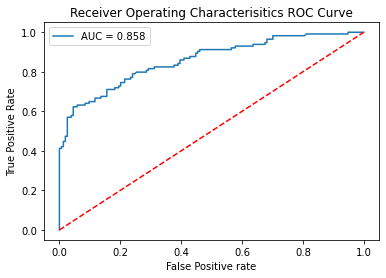

In [80]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label="AUC = "+str(auc))
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),'r--')
plt.legend()
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characterisitics ROC Curve")

## Try to improve accuracy by Transforming Fare using min max and Age into Caterogorical

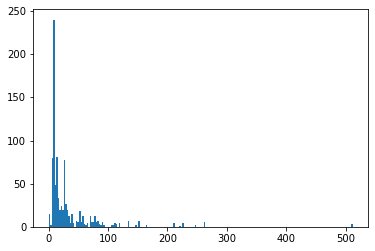

In [81]:
plt.hist(X['Fare'], bins = 200)
plt.show()
#Many Outliers present needs transformation

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

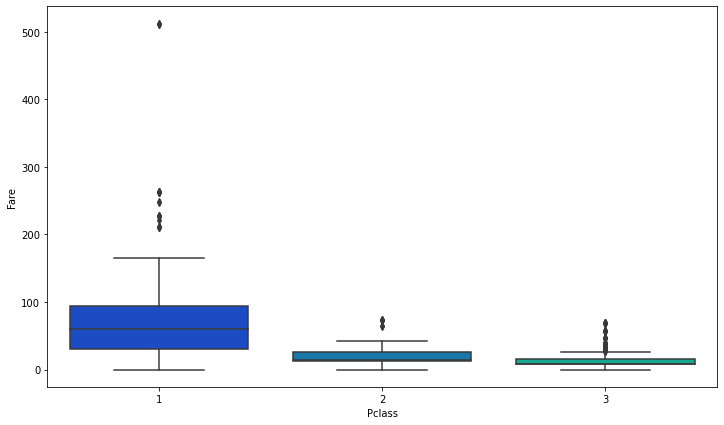

In [82]:
plt.figure(figsize=(12, 7))
sb.boxplot(x='Pclass',y='Fare',data=X,palette='winter')

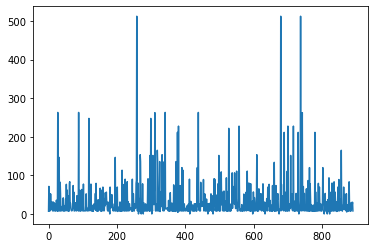

In [83]:
plt.plot(X['Fare'])
plt.show()

In [84]:
a = X['Fare'].value_counts()

In [85]:
age = pd.cut(X['Age'], [0, 10, 30, 60, 80])
age

0      (10, 30]
1      (30, 60]
2      (10, 30]
3      (30, 60]
4      (30, 60]
         ...   
886    (10, 30]
887    (10, 30]
888    (30, 60]
889    (10, 30]
890    (30, 60]
Name: Age, Length: 891, dtype: category
Categories (4, interval[int64, right]): [(0, 10] < (10, 30] < (30, 60] < (60, 80]]

In [86]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
 5   Q       891 non-null    uint8  
 6   S       891 non-null    uint8  
 7   male    891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 44.4 KB


In [87]:
fare = np.array(X['Fare'])

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# fit using the train set
scaler.fit(fare.reshape(-1,1))
# transform the test test
X_scaled = scaler.transform(fare.reshape(-1,1))
# Verify minimum value of all features
X_scaled.min(axis=0)

# Verify maximum value of all features
X_scaled.max(axis=0)
# array([1., 1., 1., 1.])

array([1.])

In [89]:
X_scaled.min(axis=0),X_scaled.max(axis=0)

(array([0.]), array([1.]))

In [90]:
X = X.drop(['Fare'], axis = 1)

In [91]:
fare = pd.DataFrame(X_scaled)

In [92]:
X2 = pd.concat([X,fare],axis=1)
X2 = X2.drop(['Age'], axis = 1)

In [93]:
X2 = pd.concat([X2,age],axis=1)

In [94]:
X2

,Pclass,SibSp,Parch,Q,S,male,0,Age
0,3,1,0,0,1,1,0.014151,"(10, 30]"
1,1,1,0,0,0,0,0.139136,"(30, 60]"
2,3,0,0,0,1,0,0.015469,"(10, 30]"
3,1,1,0,0,1,0,0.103644,"(30, 60]"
4,3,0,0,0,1,1,0.015713,"(30, 60]"
...,...,...,...,...,...,...,...,...
886,2,0,0,0,1,1,0.025374,"(10, 30]"
887,1,0,0,0,1,0,0.058556,"(10, 30]"
888,3,1,2,0,1,0,0.045771,"(30, 60]"
889,1,0,0,0,0,1,0.058556,"(10, 30]"


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=101)

In [115]:
from sklearn.model_selection import GridSearchCV
paramss = [{'penalty':['l1','l2','elasticnet','none'],'C':[0.1,0.001,1,10,100,1000],"solver":['liblinear']}]

In [118]:
gs1 = GridSearchCV(clf,param_grid = paramss,cv=5)
gs1.fit(X_train,y_train)

/home/labuser/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/labuser/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/labuser/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/labuser/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warning

/home/labuser/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/labuser/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/labuser/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/labuser/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warning

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

In [99]:
X_train

,Pclass,SibSp,Parch,Q,S,male,0,Age
520,1,0,0,0,1,0,0.182500,"(10, 30]"
510,3,0,0,1,0,1,0.015127,"(10, 30]"
446,2,0,1,0,1,0,0.038061,"(10, 30]"
2,3,0,0,0,1,0,0.015469,"(10, 30]"
691,3,0,1,0,0,0,0.026188,"(0, 10]"
...,...,...,...,...,...,...,...,...
575,3,0,0,0,1,1,0.028302,"(10, 30]"
838,3,0,0,0,1,1,0.110272,"(30, 60]"
337,1,0,0,0,0,0,0.262527,"(30, 60]"
523,1,0,1,0,0,0,0.113168,"(30, 60]"


In [109]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 520 to 863
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Pclass  623 non-null    int64   
 1   SibSp   623 non-null    int64   
 2   Parch   623 non-null    int64   
 3   Q       623 non-null    uint8   
 4   S       623 non-null    uint8   
 5   male    623 non-null    uint8   
 6   0       623 non-null    float64 
 7   Age     623 non-null    category
dtypes: category(1), float64(1), int64(3), uint8(3)
memory usage: 27.0 KB
